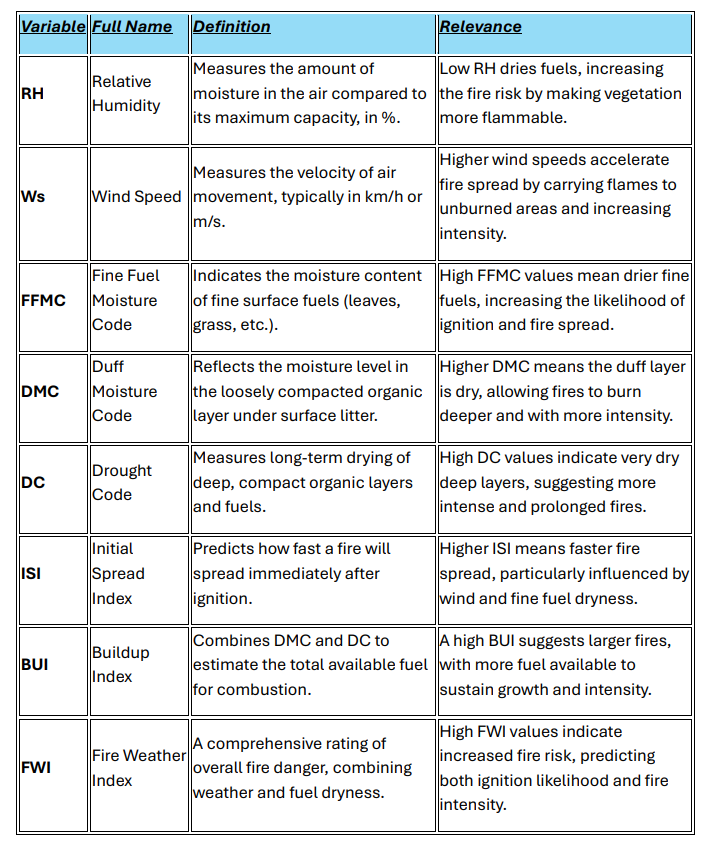

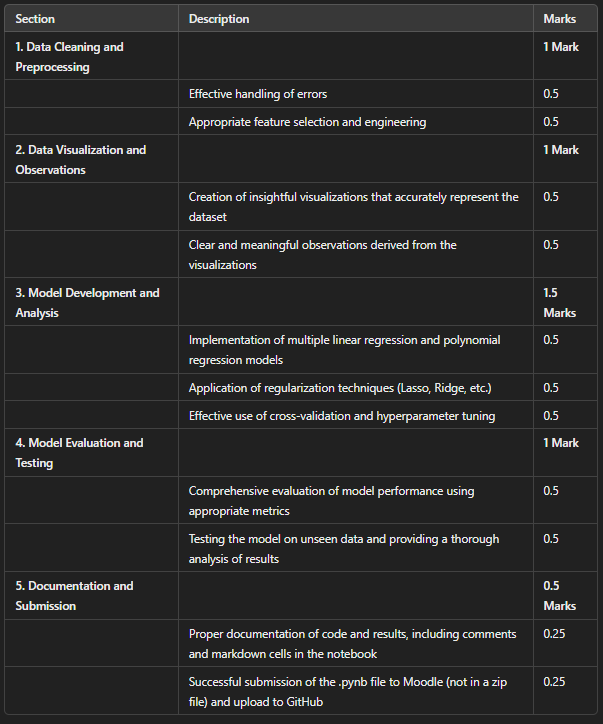

# Name - Kheshini BUDHNA (909662)

#  1. Importing libraries and creating object for metrics

In [693]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd   # For data manipulation
import numpy as np     # For numerical operations
import matplotlib.pyplot as plt  # For basic visualizations
import seaborn as sns  # For statistical data visualization
import plotly.express as px  # For interactive visualizations



In [694]:
#importing libraries for scaling, training and testing.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet

#model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [695]:
class Metrics:
    def __init__(self, r2, mse, mae, rmse):
        self.r2 = r2
        self.mse = mse
        self.mae = mae
        self.rmse = rmse

    def __repr__(self):
        return (f"Metrics(R2 score={self.r2}, MSE={self.mse}, MAE={self.mae}, RMSE={self.rmse})")

    def calc_metrics(y_true, y_pred):
    # Calculate metrics
      r2 = r2_score(y_true, y_pred)
      mse = mean_squared_error(y_true, y_pred)
      mae = mean_absolute_error(y_true, y_pred)
      rmse = np.sqrt(mse)

    # Create and return a Metrics object
      return Metrics(r2, mse, mae, rmse)

In [696]:
def plot_metrics(metrics_list, labels=None, title='Comparison of Metrics'):
    """
    Plot R², MSE, MAE, and RMSE metrics for multiple models.

    Parameters:
    metrics_list (list): A list of Metrics objects.
    labels (list): Optional labels for each model.
    title (str): Title of the plot.
    """
    if labels is None:
        labels = [f'Model {i+1}' for i in range(len(metrics_list))]

    # Extracting values for plotting
    num_metrics = len(metrics_list)
    labels_names = ['R2', 'MSE', 'MAE', 'RMSE']

    # Prepare a list to store metric values
    values = np.array([[m.r2, m.mse, m.mae, m.rmse] for m in metrics_list])

    y = np.arange(len(labels_names))  # the label locations
    width = 0.15  # the width of the bars

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(12, 10))  # Set the figure size

    # Plot each set of metrics
    for i in range(num_metrics):
        ax.barh(y + (i - num_metrics / 2) * width, values[i], width, label=labels[i])

    # Add some text for labels, title and custom y-axis tick labels, etc.
    ax.set_xlabel('Values')
    ax.set_title(title)
    ax.set_yticks(y)
    ax.set_yticklabels(labels_names)
    ax.legend()

    # Adding value annotations on the bars
    def add_value_annotations(bars):
        for bar in bars:
            width = bar.get_width()
            ax.annotate(f'{width:.3f}',  # Format to 3 decimal places
                        xy=(width, bar.get_y() + bar.get_height() / 2),
                        xytext=(3, 0),  # 3 points horizontal offset
                        textcoords="offset points",
                        ha='left', va='center')  # Align annotations to the left

    for i in range(num_metrics):
        add_value_annotations(ax.patches[i*len(labels_names):(i+1)*len(labels_names)])

    # Show the plot
    plt.tight_layout()
    plt.show()

# 2. Loading dataset.

In [697]:
df = pd.read_csv("Algerian_forest_fires_cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


# 3. Data cleaning.

## 3.1 Data shape and structure (to identify further data cleaning steps)


In [698]:
# Find the number of rows and columns
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")


Rows: 243, Columns: 15


In [699]:
# Get summary information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [700]:
#showing the list of missing values
df.isna().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [701]:
# descriptive statistics
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


***No null values or weird outliers noted.***

## 3.2. Encoding the "Classes" Column (categorical data to numerical data)



In [702]:
#remove leading/trailing spaces
df['Classes'] = df['Classes'].str.strip()

# Check the unique values to confirm changes
print(df['Classes'].unique())

['not fire' 'fire']


In [703]:
# Check and clean the 'Classes' column
print(df['Classes'].unique())  # Check unique values to confirm correctness

['not fire' 'fire']


In [704]:
# Optionally, map 'not fire' to 0 and 'fire' to 1 manually
df['Classes'] = df['Classes'].map({'not fire': 0, 'fire': 1})

print(df.head())  # Check the DataFrame to ensure the changes are applied correctly


   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  Region  
0  0.5        0       0  
1  0.4        0       0  
2  0.1        0       0  
3  0.0        0       0  
4  0.5        0       0  


## 3.3. Rearranging columns (so that "Fire Weather Index" / Target variable is the last column).

In [705]:
columns = [col for col in df.columns if col != 'FWI']  # Get all columns except 'Classes'
columns.append('FWI')  # Add 'Classes' at the end
df = df[columns]  # Reorder columns

print(df.head())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   Classes  Region  FWI  
0        0       0  0.5  
1        0       0  0.4  
2        0       0  0.1  
3        0       0  0.0  
4        0       0  0.5  


# 4. Data vizualization

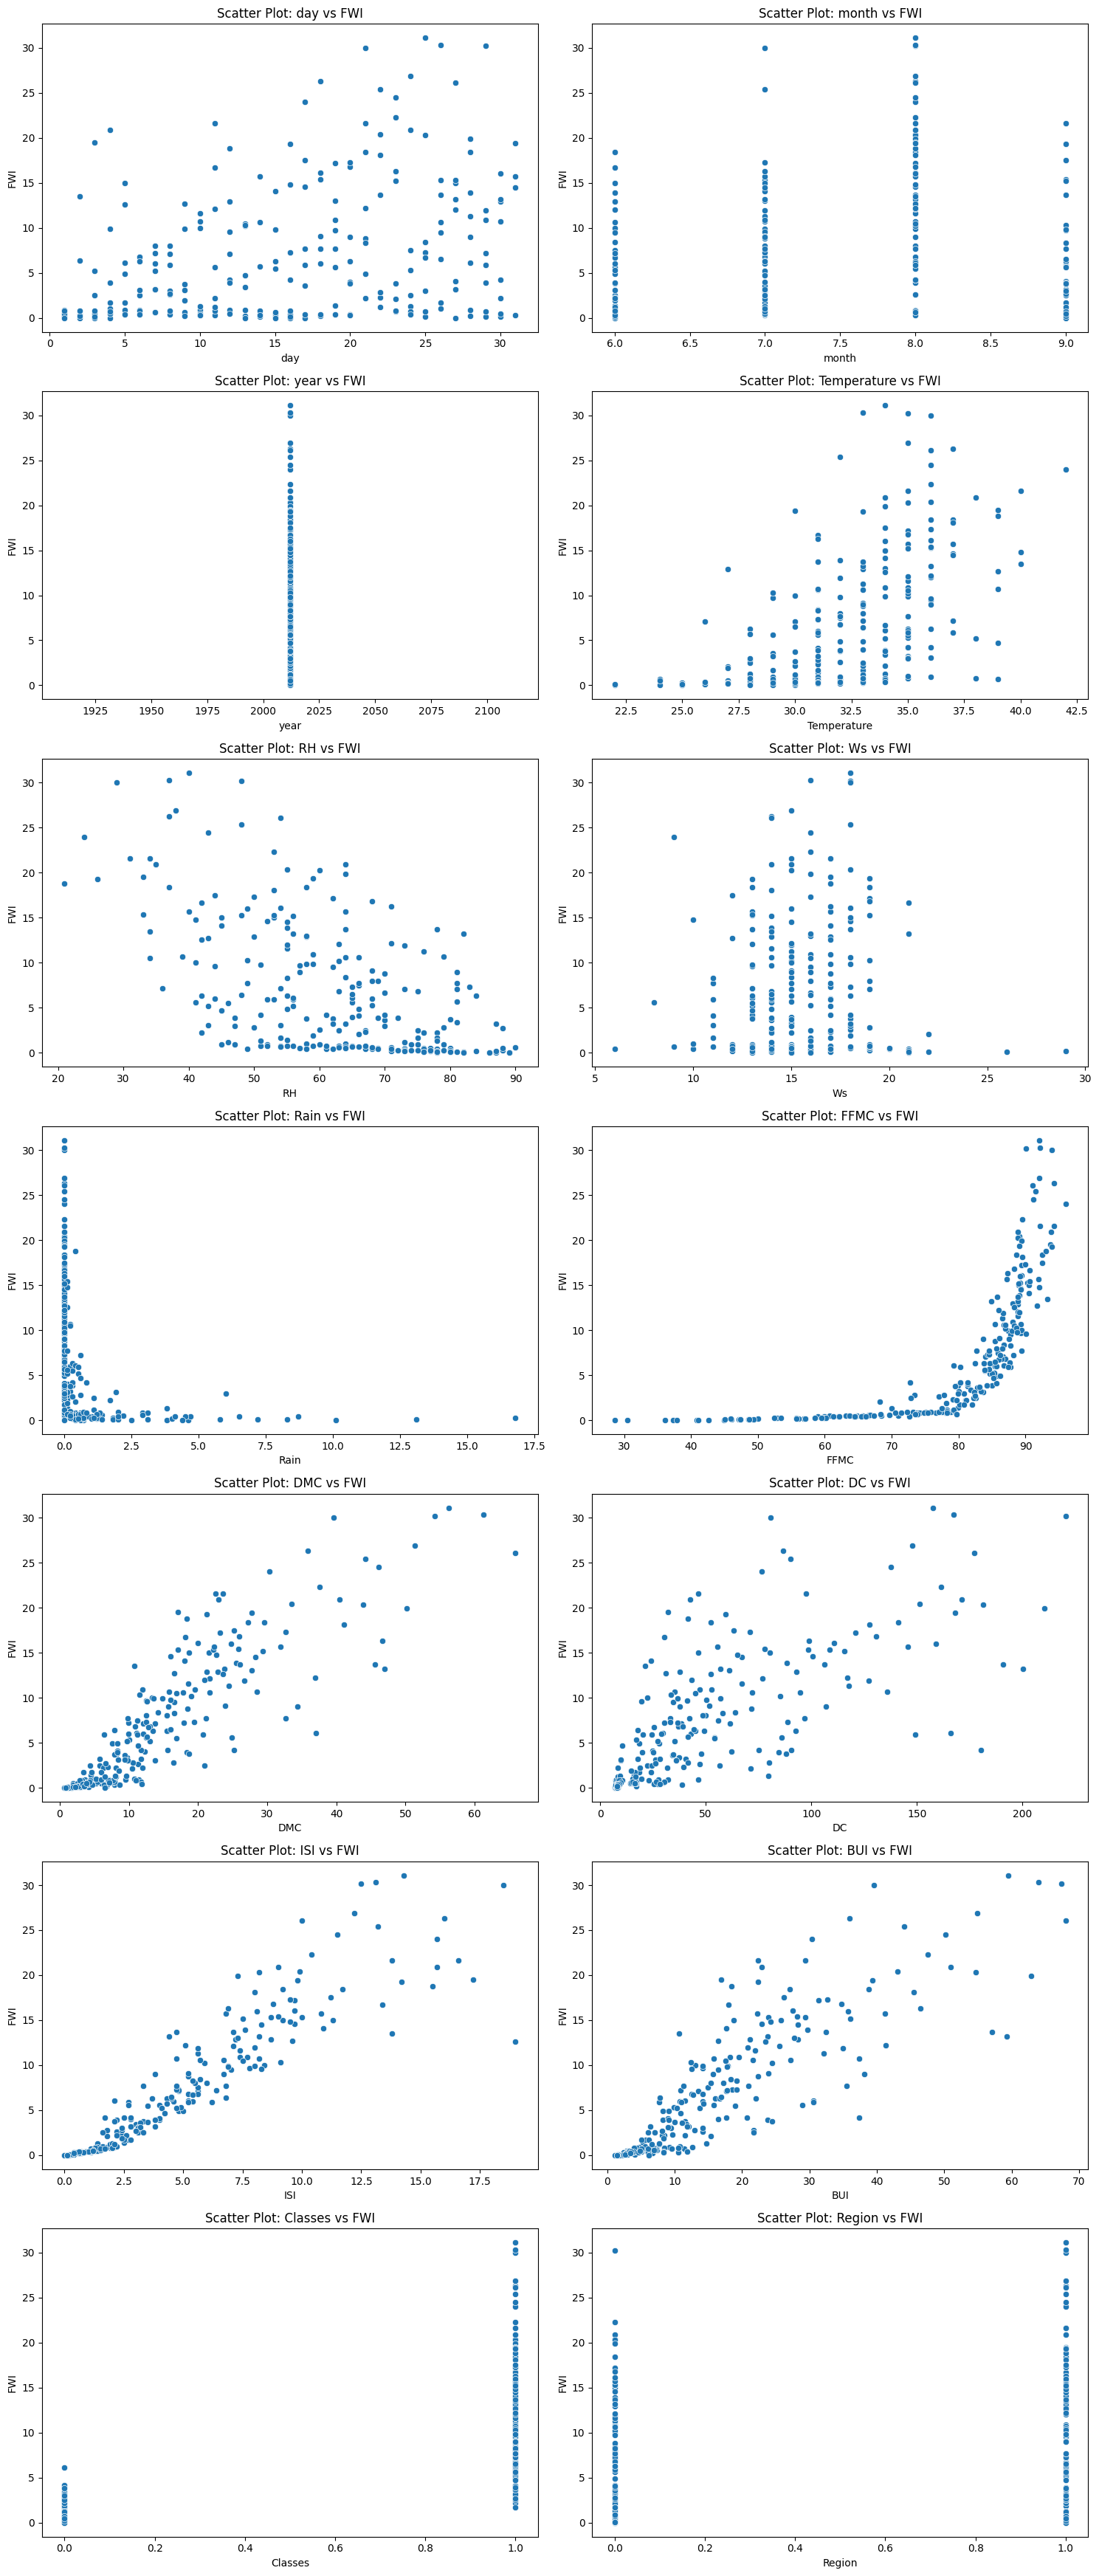

In [706]:
# Specify your target variable
target_variable = 'FWI'
features = df.columns[df.columns != target_variable]  # Get all feature names

# Set the number of plots
num_features = len(features)
num_cols = 2  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axs = axs.flatten()  # Flatten to easily iterate

# Loop through features and create plots
for i, feature in enumerate(features):
    # Scatter plot for continuous features
    if df[feature].dtype in [ 'int64','float64']:
        sns.scatterplot(x=df[feature], y=df[target_variable], ax=axs[i])
        axs[i].set_title(f'Scatter Plot: {feature} vs {target_variable}')
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel(target_variable)
    else:  # For categorical features, you can use a box plot
        sns.boxplot(x=df[feature], y=df[target_variable], ax=axs[i])
        axs[i].set_title(f'Box Plot: {feature} vs {target_variable}')
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel(target_variable)

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


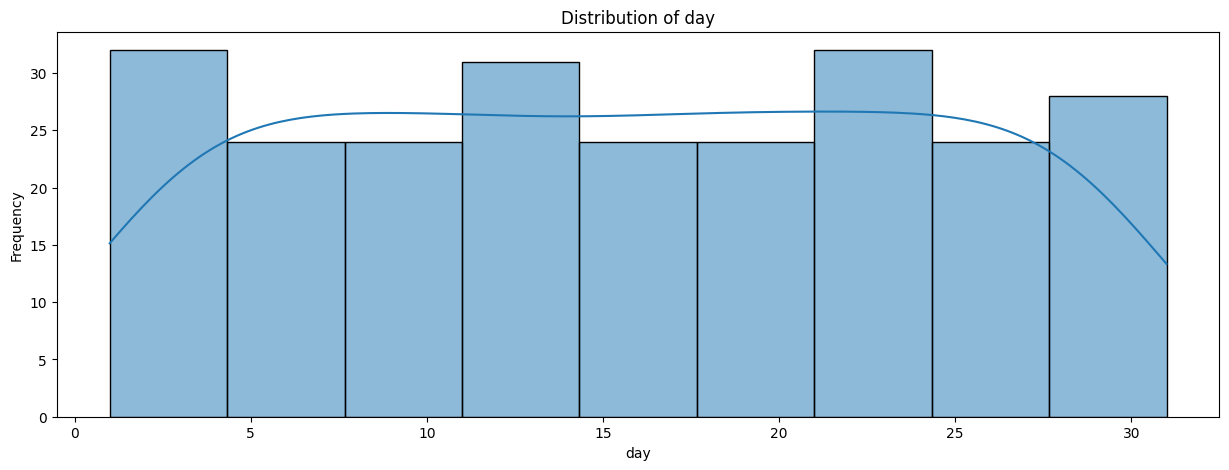

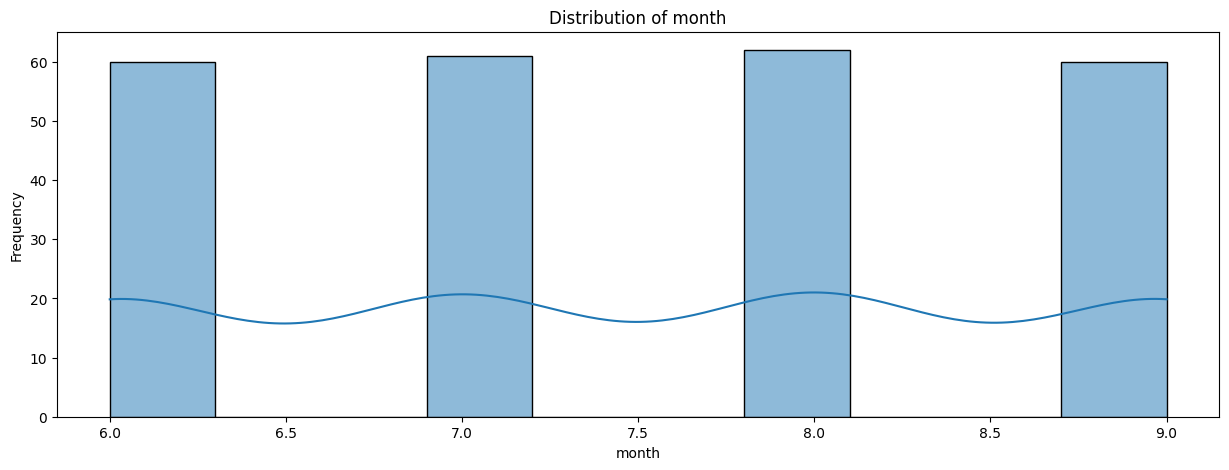

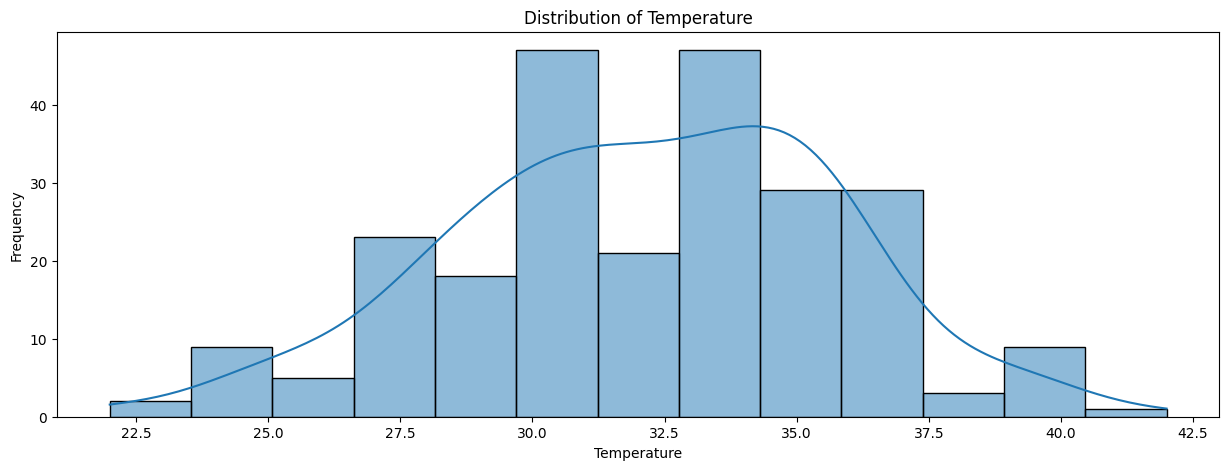

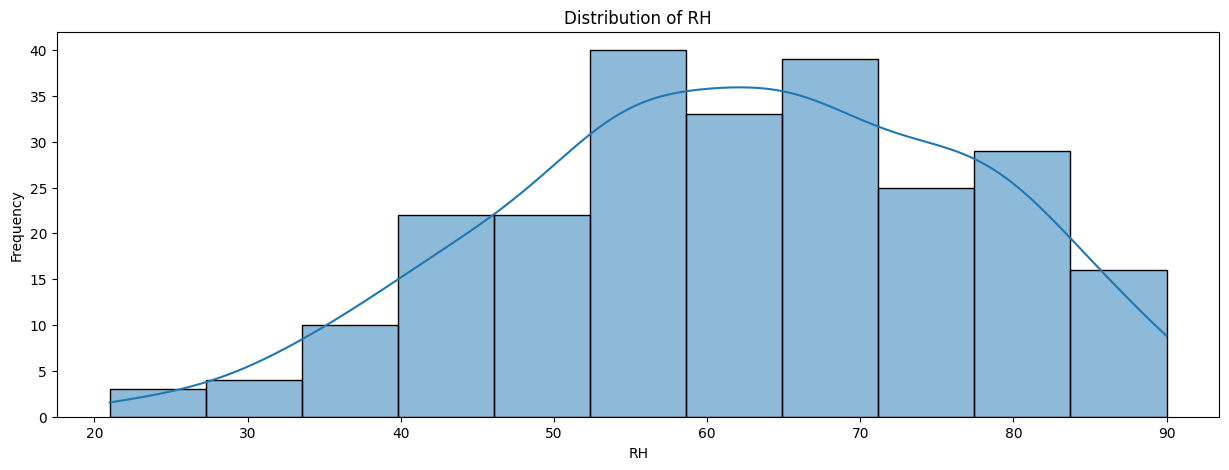

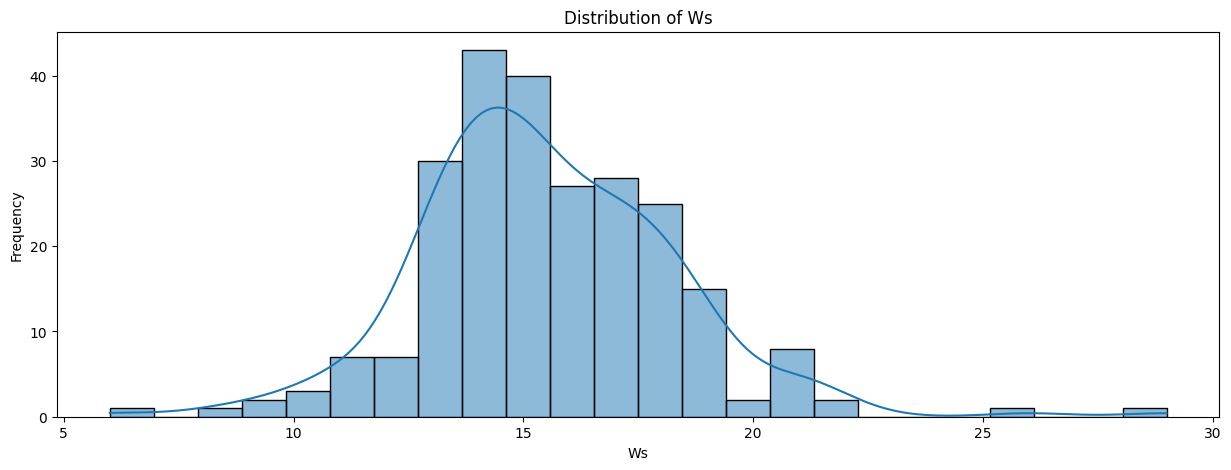

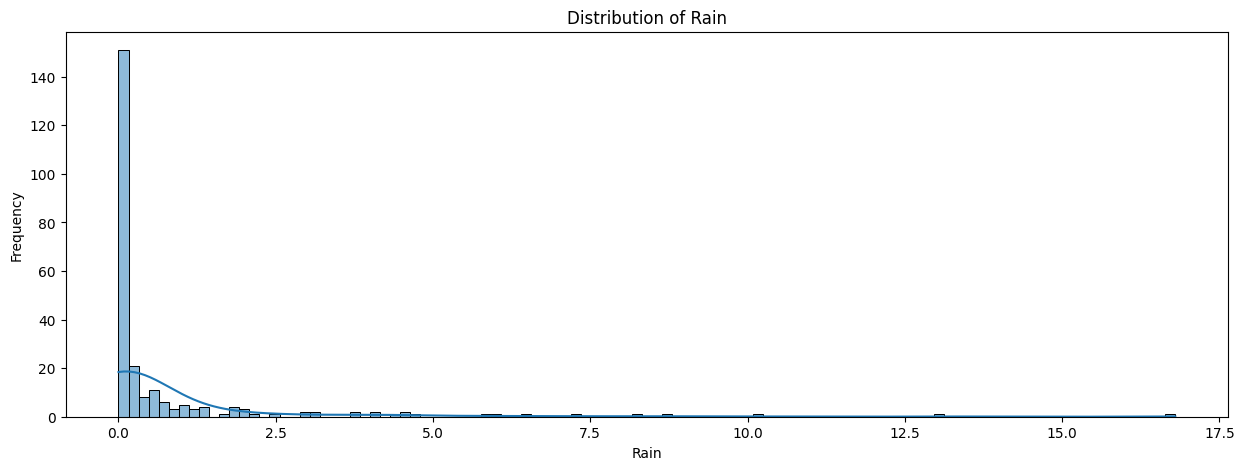

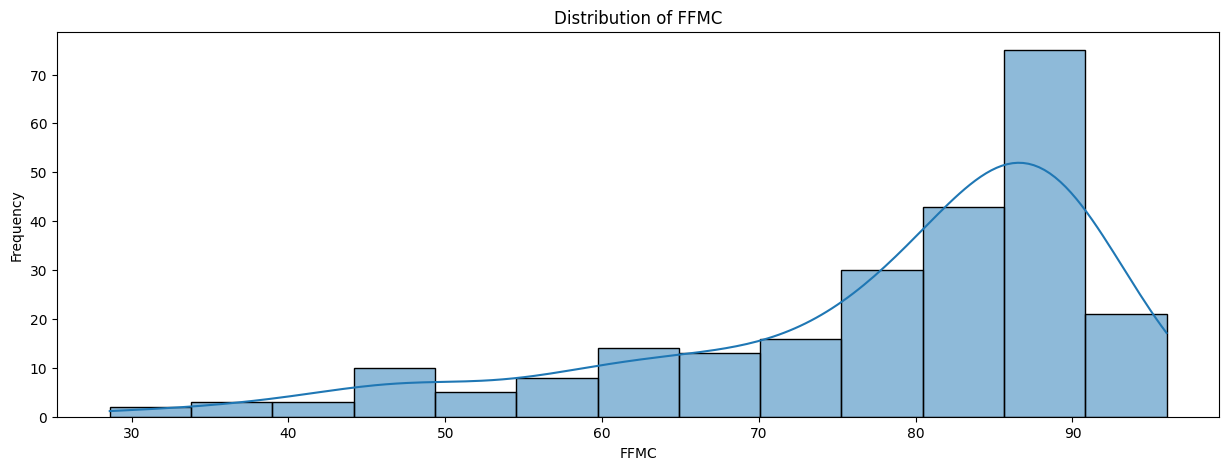

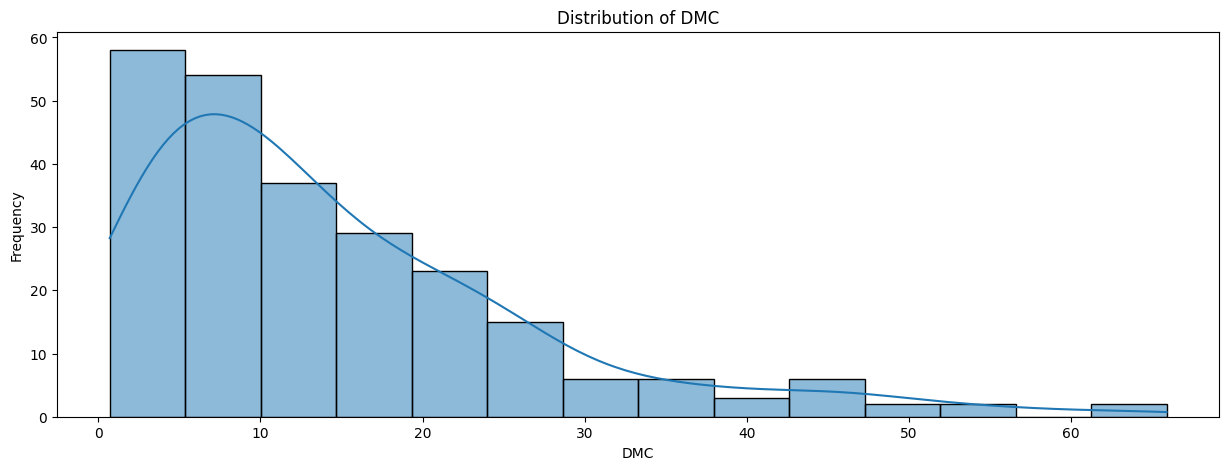

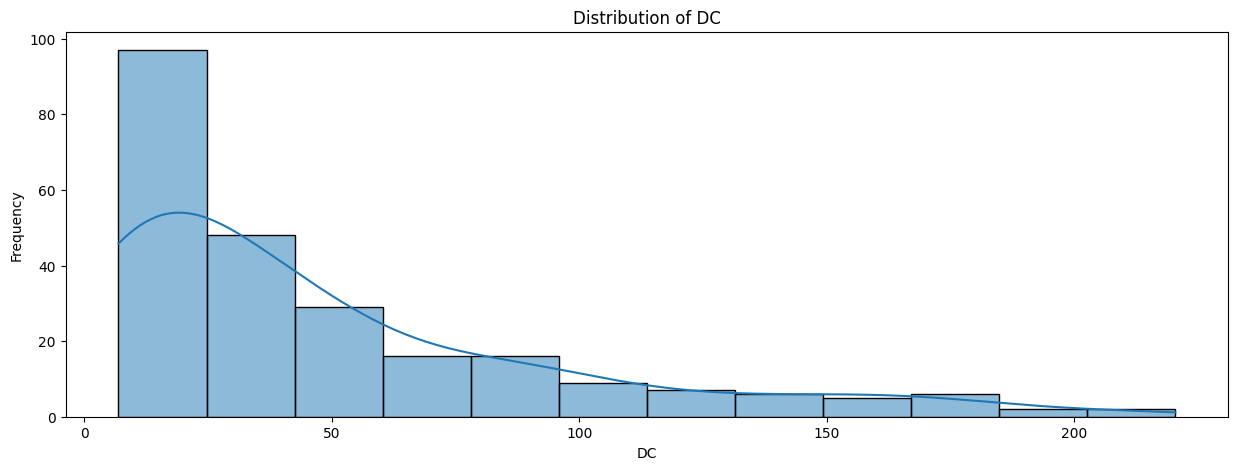

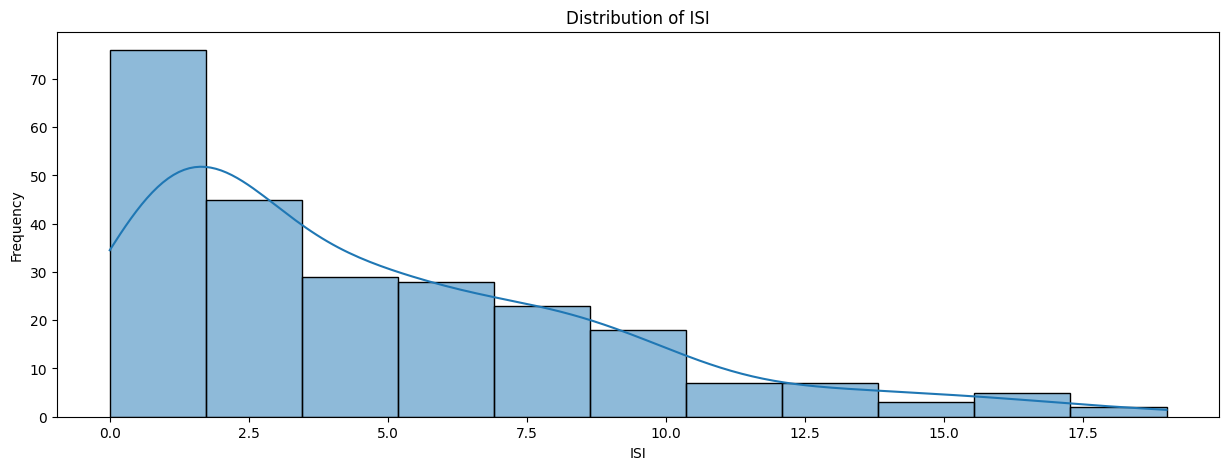

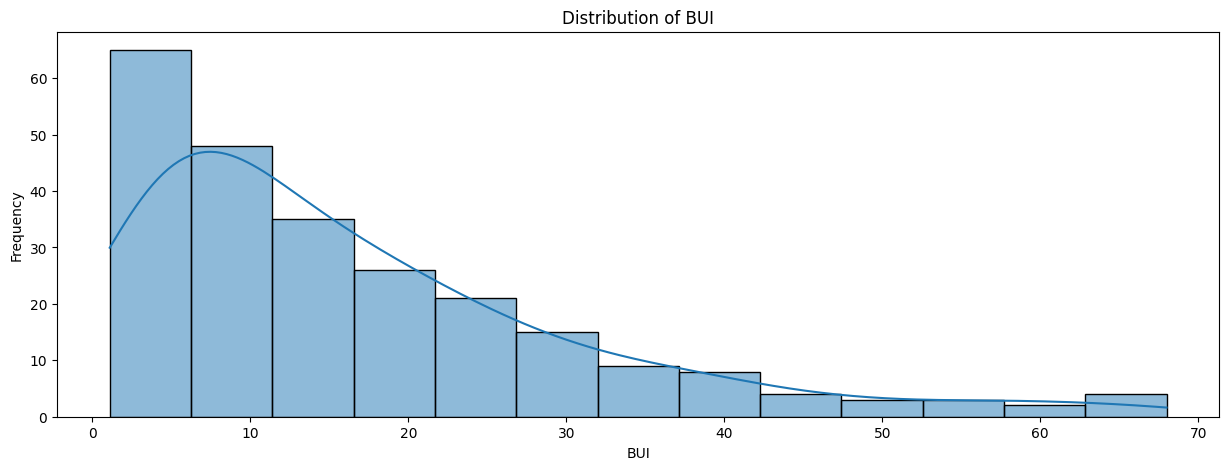

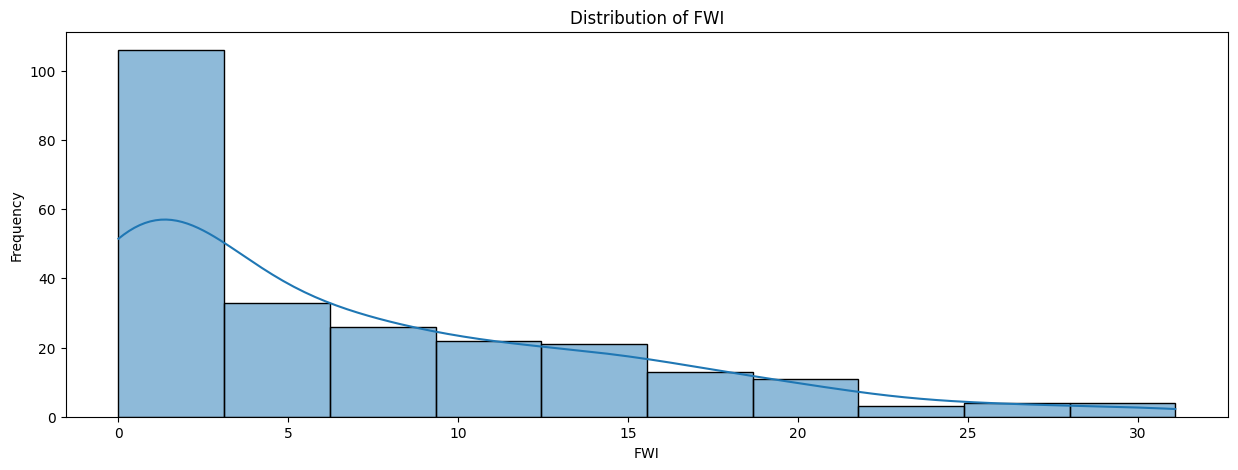

In [707]:
# Plotting distribution for columns except 'Region' and 'Classes'
for col in df.columns:
    if col not in ['Region', 'Classes', 'year']:  # Skip these columns
        plt.figure(figsize=(15, 5))
        sns.histplot(df[col], kde=True)  # Use histplot with KDE for better visualization
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

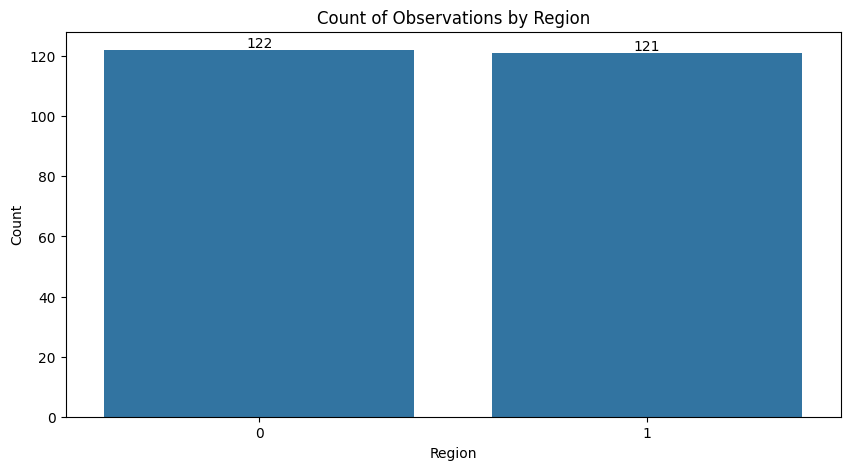

In [708]:
# Bar chart for 'Region'
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Region')  # Using custom colors

plt.title('Count of Observations by Region')
plt.xlabel('Region')
plt.ylabel('Count')

# Adding count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()


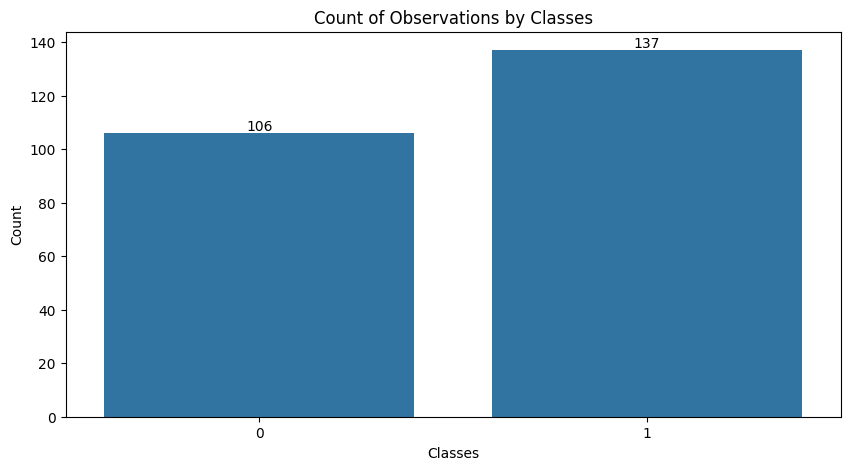

In [709]:
#Bar chart for 'Region'
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Classes')

plt.title('Count of Observations by Classes')
plt.xlabel('Classes')
plt.ylabel('Count')

# Adding count on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

# 5. Feature Engineering

## 5.1 Identifying correlation between dependant variables and independant variables

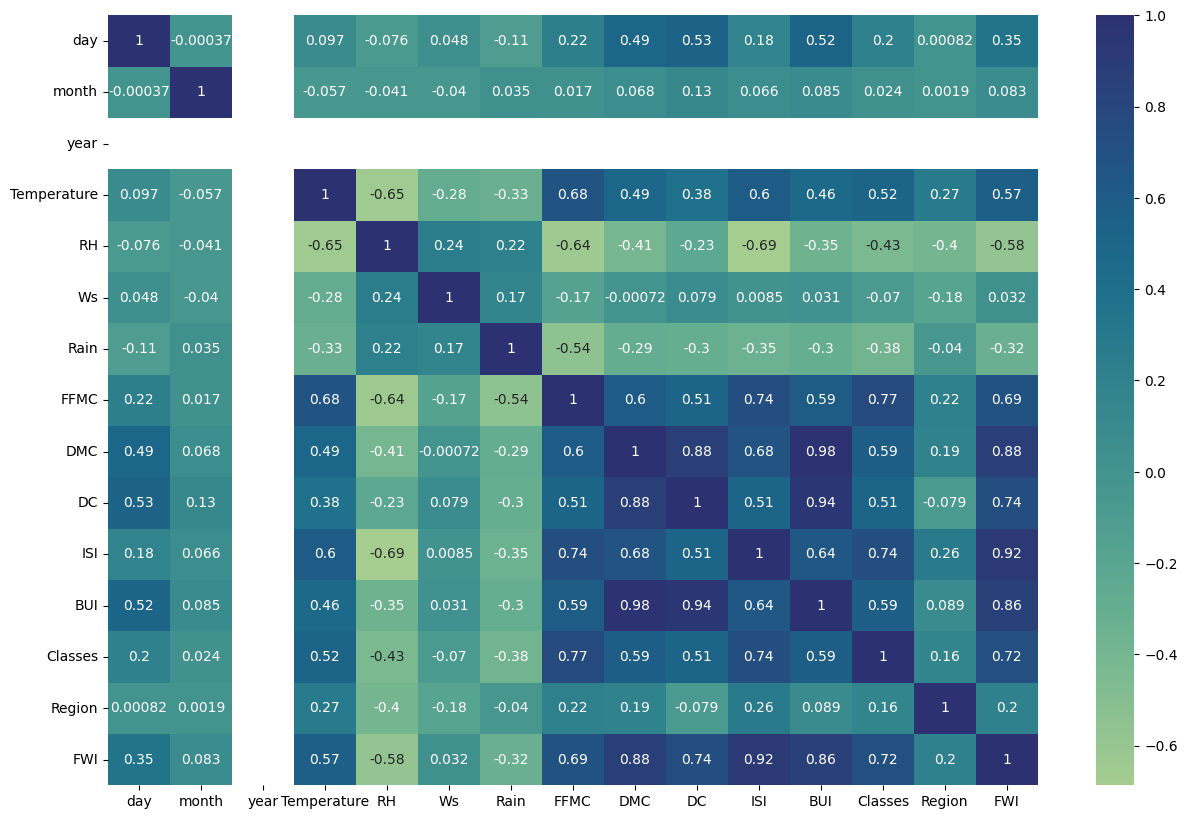

In [710]:
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='crest')
plt.show()


### 5.1.1 High correlations identified.

1.   Between independant variables

*   DMC and DC have a high correlation (0.88).
*   DMC and BUI have a very high correlation (0.98).
*   ISI and BUI have a high correlation (0.92).
*  year is a redundant feature, so it has to be deleted.

2.   Between dependant and independant variables

*   DMC and FWI have a very high correlation (0.88)
*   BUI and FWI have a high correlation (0.86).
*   ISI and FWI have a high correlation (0.92).



### 5.1.2 Low correlations identified between dependant and independant varibles:


*  month and FWI have a low correlation (0.083).
*  WS and FWI have a low correlation (0.032)
*  Region and FWI have a low correlation (0.2).




In [711]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select all columns except the target variable
features = df.drop(columns=['FWI'])
# Drop the target variable (replace 'FWI' with your target column name)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = features.columns
vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Display the VIF results
print(vif)


        Feature         VIF
0           day    1.487548
1         month    1.094968
2          year  553.931365
3   Temperature    2.421816
4            RH    3.205144
5            Ws    1.334699
6          Rain    1.577687
7          FFMC    4.952404
8           DMC   85.353688
9            DC   25.416664
10          ISI    5.008219
11          BUI  165.923951
12      Classes    3.444546
13       Region    1.616323


In [712]:
# Filter and print features with VIF > 5.0
high_vif_features = vif[vif['VIF'] > 5.0]
print(high_vif_features)

   Feature         VIF
2     year  553.931365
8      DMC   85.353688
9       DC   25.416664
10     ISI    5.008219
11     BUI  165.923951


## 5.2 Deleting features to avoid overfitting.

In [713]:
df.drop(columns=['DMC', 'DC', 'BUI', 'month', 'year'], inplace=True)

In [714]:
df.head()

,day,Temperature,RH,Ws,Rain,FFMC,ISI,Classes,Region,FWI
0,1,29,57,18,0.0,65.7,1.3,0,0,0.5
1,2,29,61,13,1.3,64.4,1.0,0,0,0.4
2,3,26,82,22,13.1,47.1,0.3,0,0,0.1
3,4,25,89,13,2.5,28.6,0.0,0,0,0.0
4,5,27,77,16,0.0,64.8,1.2,0,0,0.5


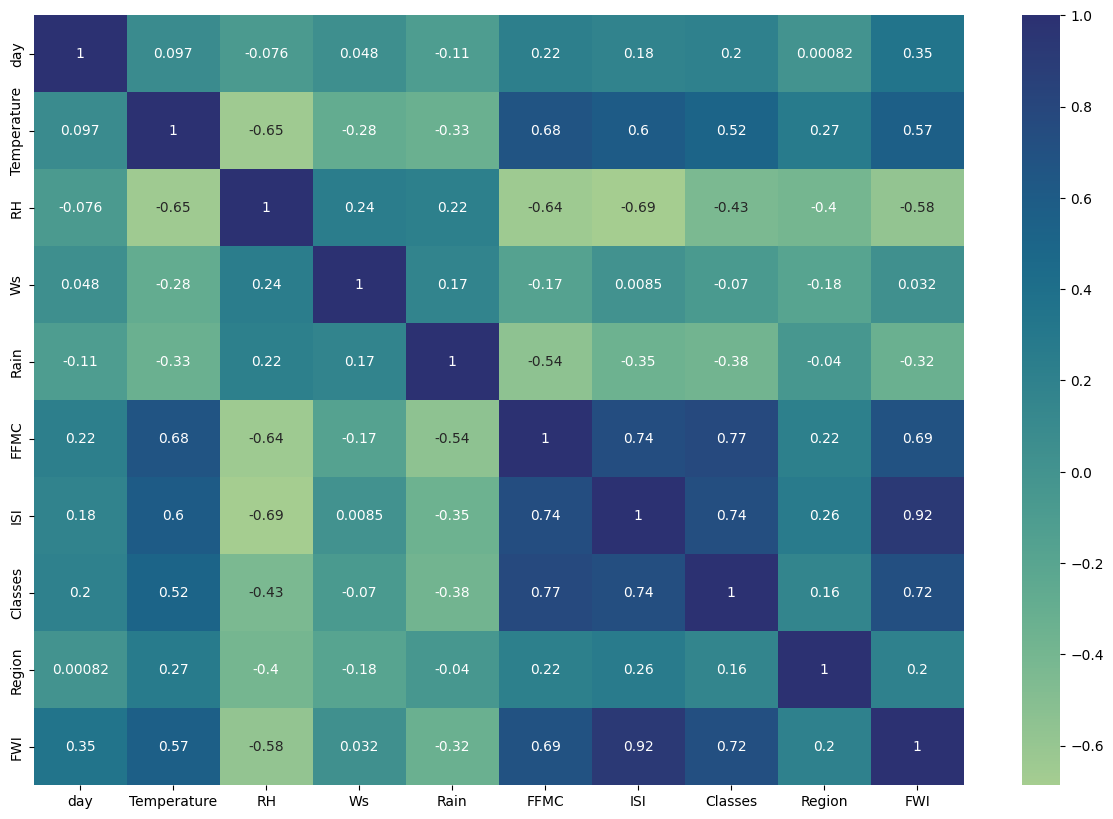

In [715]:
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='crest')
plt.show()

# 6. Machine learning Model 1 - Multilinear regression.

## 6.1 Split into training and testing data

In [716]:
#split data into input variable and output variable
X = df.drop('FWI', axis=1)

y = df['FWI']

In [717]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, #test size will be 20% of dataset
                                                    random_state=42)


## 6.2 Scale the data.  

In [718]:
scaler1 = StandardScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

## 6.3 Build model 1

In [719]:
#build the model using LinearRegression
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression() #initiate the model
lr1.fit(X_train, y_train) #train the model

LinearRegression()

In [720]:
# Print the coefficients for each input variable
print("Coefficients:")
for i, col in enumerate(X.columns):
    print(f"{col}: {lr1.coef_[i]}")

Coefficients:
day: 1.4984307318564685
Temperature: 0.5319452356613286
RH: 0.5701313595252021
Ws: 0.05690126722607125
Rain: -0.0608030219128054
FFMC: -0.4995230878968653
ISI: 6.918952802020392
Classes: 0.5838777139821094
Region: -0.20369627322594577


In [721]:
print(f"Intercept: {lr1.intercept_}")

Intercept: 7.420103092783505


In [722]:
y_train_pred = lr1.predict(X_train)

#get metrics on training dataset
model1_training_metrics = Metrics.calc_metrics(y_train, y_train_pred)
print("Metrics of Model 1 on training dataset:")
print(model1_training_metrics)

Metrics of Model 1 on training dataset:
Metrics(R2 score=0.8892012336334123, MSE=6.722236314683569, MAE=1.7812446520825775, RMSE=2.5927275820424267)


## 6.4 Evaluate model 1 on testing data

In [723]:
y_pred = lr1.predict(X_test)

In [724]:
model1_testing_metrics = Metrics.calc_metrics(y_test, y_pred)
print("Metrics of Model 1 on testing dataset:")
print(model1_testing_metrics)

Metrics of Model 1 on testing dataset:
Metrics(R2 score=0.9199077957371603, MSE=2.427468284945049, MAE=1.2734463248294754, RMSE=1.558033467209562)


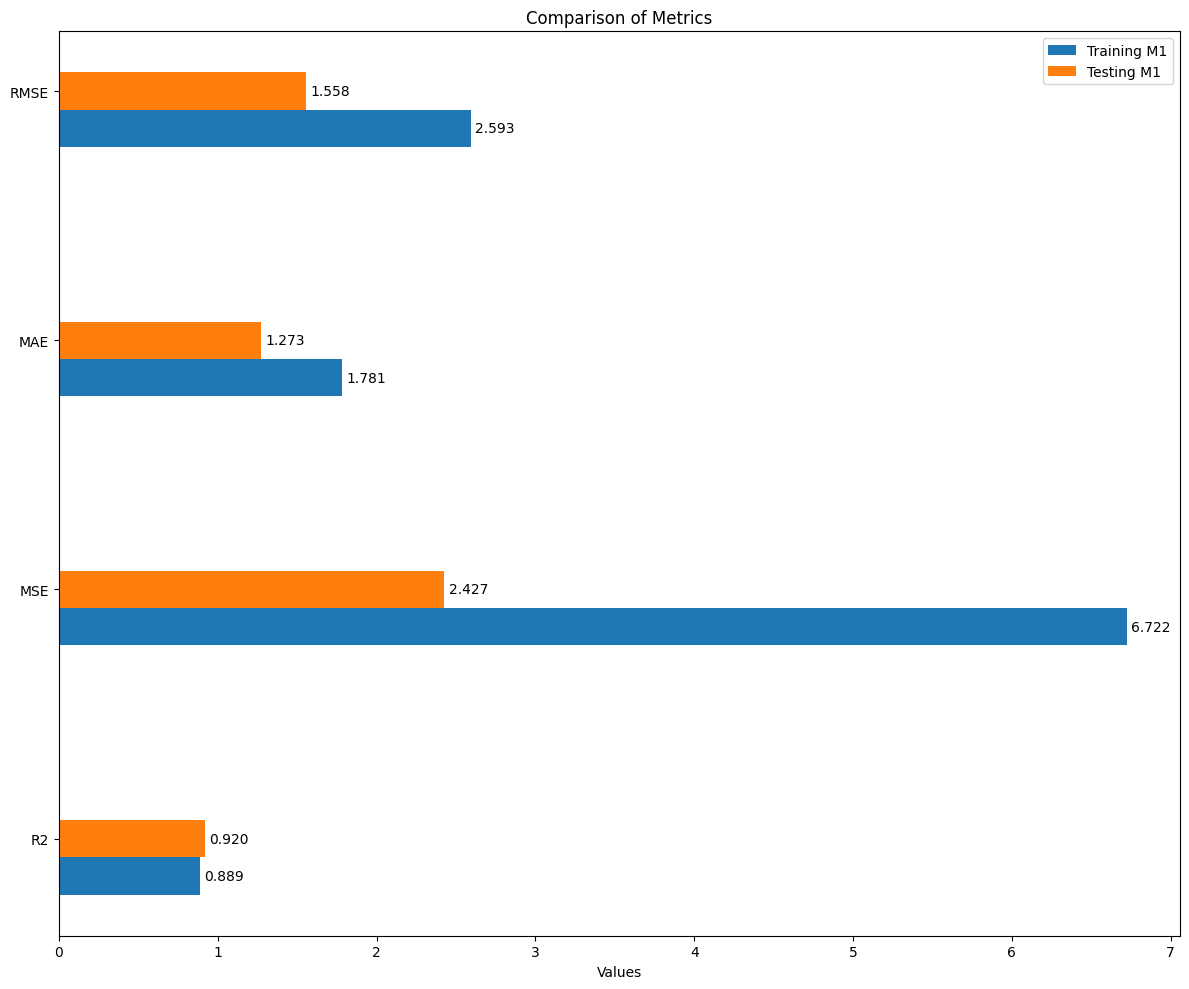

In [725]:
plot1_metrics = [model1_training_metrics, model1_testing_metrics]
plot1_labels = ['Training M1', 'Testing M1']
plot_metrics(plot1_metrics, plot1_labels)



*   Model 1 achieved an R² score of 0.889 on the training dataset and 0.920 on the testing dataset, indicating strong performance and good generalization.
* The Mean Squared Error (MSE) improved from approximately 6.72 (training) to 2.43 (testing), reflecting enhanced accuracy.
*   Mean Absolute Error (MAE) decreased from 1.78 on the training set to 1.27 on the testing set, showing reduced prediction errors.
*   The Root Mean Squared Error (RMSE) also improved, dropping from about 2.59 to 1.56, highlighting better predictive performance on unseen data.  
*   Overall, these metrics indicate that Model 1 performs well, demonstrating effective predictive capabilities.  


#Machine learning model 2 - Polynomial regression.

In [726]:
# Creating polynomial features
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)

# Fitting the polynomial regression model
pr1 = LinearRegression()
pr1.fit(X_poly_train, y_train)


LinearRegression()

In [727]:
# Transform the training data again using the same polynomial features
X_train_poly = poly_features.transform(X_train)

# Use the trained model (pr1) to predict on the transformed training data
y_train_pred = pr1.predict(X_train_poly)


# Call the get_metrics method to calculate the metrics
model2_training_metrics = Metrics.calc_metrics(y_train, y_train_pred)

# Print the metrics
print("Metrics of Model 2 on training dataset:")
print(model2_training_metrics)

Metrics of Model 2 on training dataset:
Metrics(R2 score=0.9575555282719365, MSE=2.575134891519784, MAE=1.1241529012463756, RMSE=1.6047226836808235)


In [728]:
# Making predictions
X_poly_test = poly_features.transform(X_test)
y_poly_pred = pr1.predict(X_poly_test)

# Call the get_metrics method to calculate the metrics
model2_testing_metrics = Metrics.calc_metrics(y_test, y_poly_pred)

# Print the metrics
print("Metrics of Model 2 on training dataset:")
print(model2_testing_metrics)

Metrics of Model 2 on training dataset:
Metrics(R2 score=0.9267776801304183, MSE=2.2192529331594324, MAE=1.1305958650550063, RMSE=1.4897157222636246)


In [729]:
# Outputting coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-3.82439619e-15  1.34545719e+00 -5.63738678e-02  2.45338459e+00
  4.02933647e-02  5.84532511e+00  7.12040803e+00  4.46354799e+00
  2.51582835e+11 -1.64120185e+10 -5.23233594e-02 -3.35133104e-02
  2.28274241e-01 -1.33555349e-01 -2.48480493e-02  9.85510642e-02
  2.01125241e+00 -4.09481952e-01 -1.58308546e-01 -1.39765714e-01
  2.49471512e-01 -1.68498440e-01 -1.25636796e+00  5.27035179e-01
 -5.10989046e-01  4.35371447e-01 -2.07389196e-01  5.90013082e-01
  5.53373019e-02  2.40557625e+00 -5.08656119e-02  2.54483158e+00
  1.21032390e-01 -5.33340454e-01 -4.76074219e-02 -4.53840256e-01
  2.42606163e-01  2.37060547e-01 -2.30018616e-01 -1.19895935e-01
  1.90906525e-02  1.71479416e+00  6.61767578e+00 -5.70999146e-01
  1.59637451e-01 -1.08720398e+00  1.03390884e+01 -1.82132149e+00
 -1.61437988e-01 -1.94313049e-01 -1.01177216e+00 -1.64031982e-01
  9.30129985e+11  2.47596741e-01 -7.95940596e+11]
Intercept: -134189389367.95282


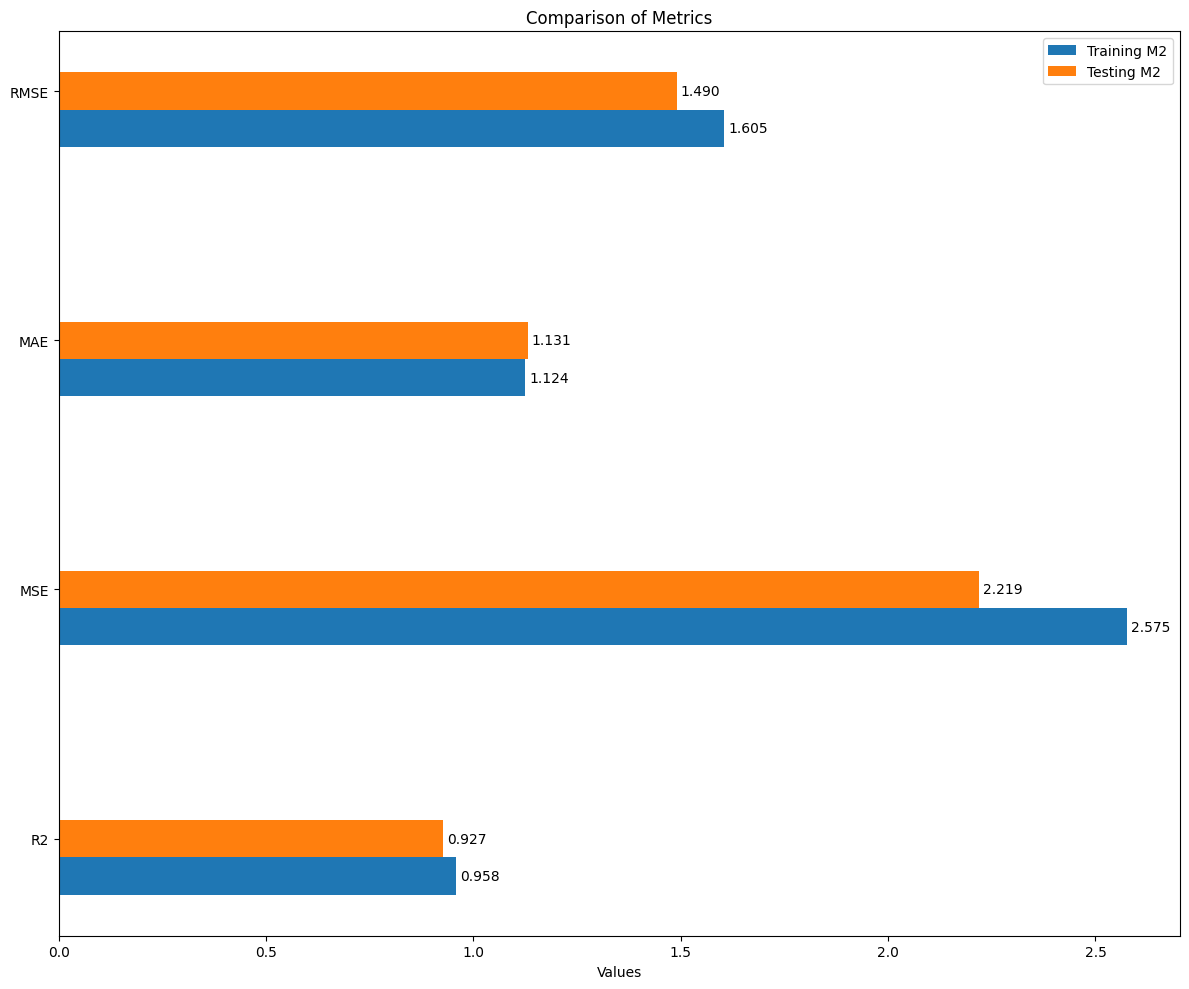

In [730]:
plot2_metrics = [model2_training_metrics, model2_testing_metrics]
plot2_labels = ['Training M2', 'Testing M2']
plot_metrics(plot2_metrics, plot2_labels)

1. The R2 score is slightly lower on the test dataset (0.9268) compared to the training dataset (0.9576), indicating that Model 2 fits the training data well but has a slightly diminished performance on unseen data.

2. MSE on the test dataset (2.2193) is lower than on the training dataset (2.5751), which could suggest a well-generalized model that predicts fairly accurately on both datasets.

3. The MAE values are almost identical on both datasets (training: 1.1242, test: 1.1306), implying consistent prediction accuracy across both sets in terms of absolute error.

4. RMSE is slightly lower on the test dataset (1.4897) compared to the training dataset (1.6047), suggesting good generalization with slightly better performance on the test data.

5. Model 2 performs consistently across both datasets, demonstrating a well-trained and generalized model with minimal overfitting. Its performance is strong, with very small differences between the training and test metrics.



# Comparing Model 1 and Model 2.

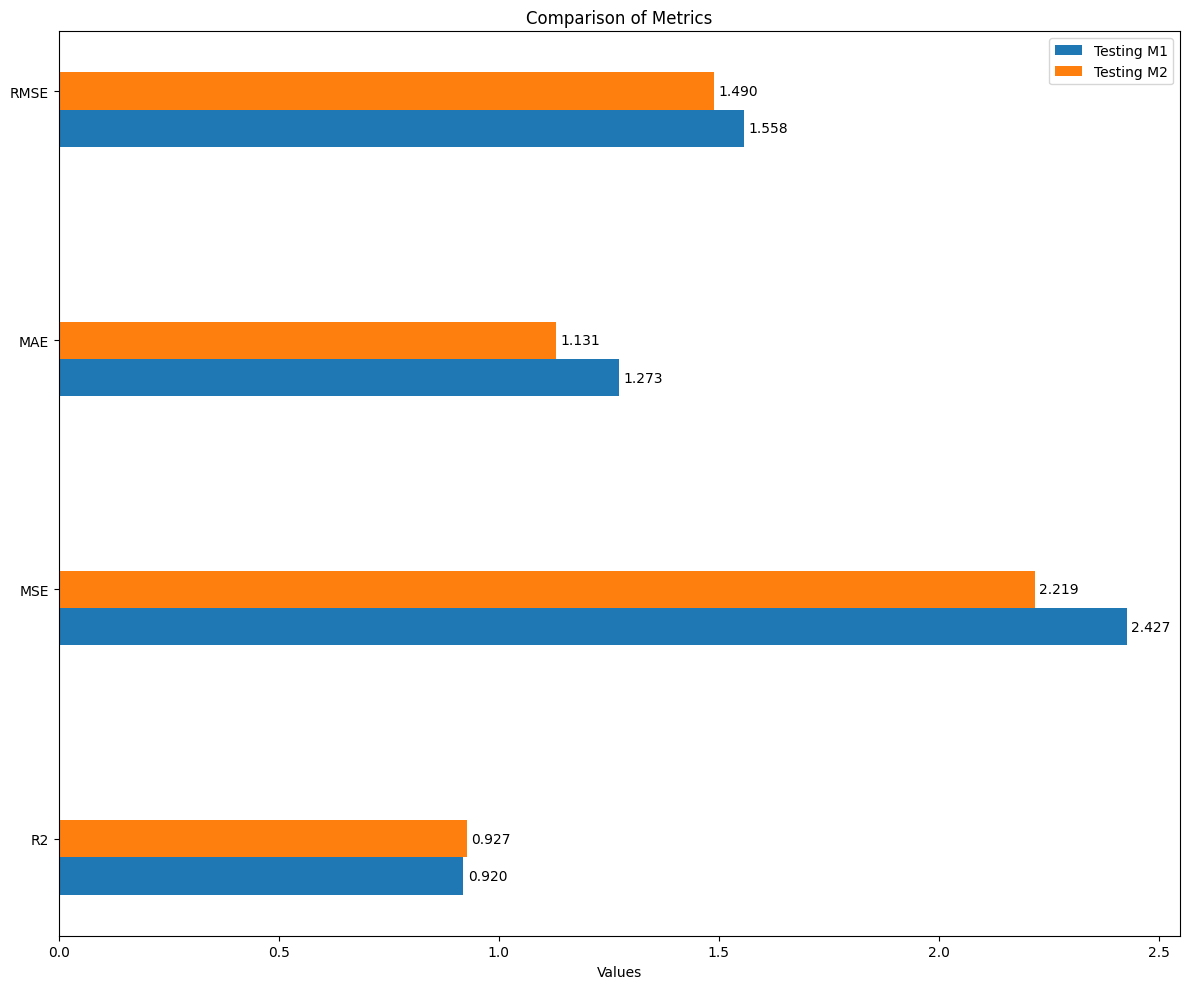

In [731]:
plot3_metrics = [model1_testing_metrics, model2_testing_metrics]
plot3_labels = ['Testing M1', 'Testing M2']
plot_metrics(plot3_metrics, plot3_labels)

In [732]:
print("Metrics of Model 1 on testing dataset:")
print(model1_testing_metrics)
print("Metrics of Model 2 on testing dataset:")
print(model2_testing_metrics)

Metrics of Model 1 on testing dataset:
Metrics(R2 score=0.9199077957371603, MSE=2.427468284945049, MAE=1.2734463248294754, RMSE=1.558033467209562)
Metrics of Model 2 on testing dataset:
Metrics(R2 score=0.9267776801304183, MSE=2.2192529331594324, MAE=1.1305958650550063, RMSE=1.4897157222636246)


1. Model 2 performs slightly better than Model 1, with an R² of 0.9268 versus 0.9199. This means Model 2 explains a bit more of the variance in the test data than Model 1.
2. Model 2 also has a lower MSE (2.2193) compared to Model 1 (2.4275), indicating it makes fewer large errors in predictions.
3. Model 2 again outperforms Model 1 in terms of absolute error, with an MAE of 1.1306 versus Model 1's 1.2734. This suggests that, on average, Model 2's predictions are closer to the actual values.
4. Model 2 has a lower RMSE (1.4897) compared to Model 1 (1.5580), meaning its overall prediction accuracy is slightly better.

Hence,  Model 2 is the better option due to its consistently lower errors and better overall performance across all key metrics.

# Hyperparameter Tuning on Model 2.

## 1. Lasso

In [733]:
# Step 1: Generate polynomial features
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Step 2: Define the Lasso model
poly_lasso_model = Lasso(max_iter=10000)

# Step 3: Set the alpha values to be tested
param_grid = {'alpha': [0.001, 0.01, 0.1, 1]}

# Step 4: Set up the grid search with cross-validation
grid_search = GridSearchCV(poly_lasso_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Step 5: Fit the grid search to your training data
grid_search.fit(X_poly_train, y_train)

# Step 6: Get the best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"The best alpha value for Lasso is: {best_alpha}")

The best alpha value for Lasso is: 0.1


In [734]:
# Step 7: Evaluate the best model on the training set
best_model_lasso = grid_search.best_estimator_
y_pred_train = best_model_lasso.predict(X_poly_train)
lasso_training_metrics = Metrics.calc_metrics(y_train, y_pred_train)
print("Metrics of Lasso on training dataset:")
print(lasso_training_metrics)

# Step 8: Evaluate the best model on the test set
y_pred = best_model_lasso.predict(X_poly_test)
lasso_testing_metrics = Metrics.calc_metrics(y_test, y_pred)
print("Metrics of Lasso on testing dataset:")
print(lasso_testing_metrics)

Metrics of Lasso on training dataset:
Metrics(R2 score=0.9396660030272479, MSE=3.6605045232935773, MAE=1.2705862858327925, RMSE=1.913244501702168)
Metrics of Lasso on testing dataset:
Metrics(R2 score=0.9209085763465641, MSE=2.3971362044151743, MAE=1.1050231307523357, RMSE=1.548268776542101)


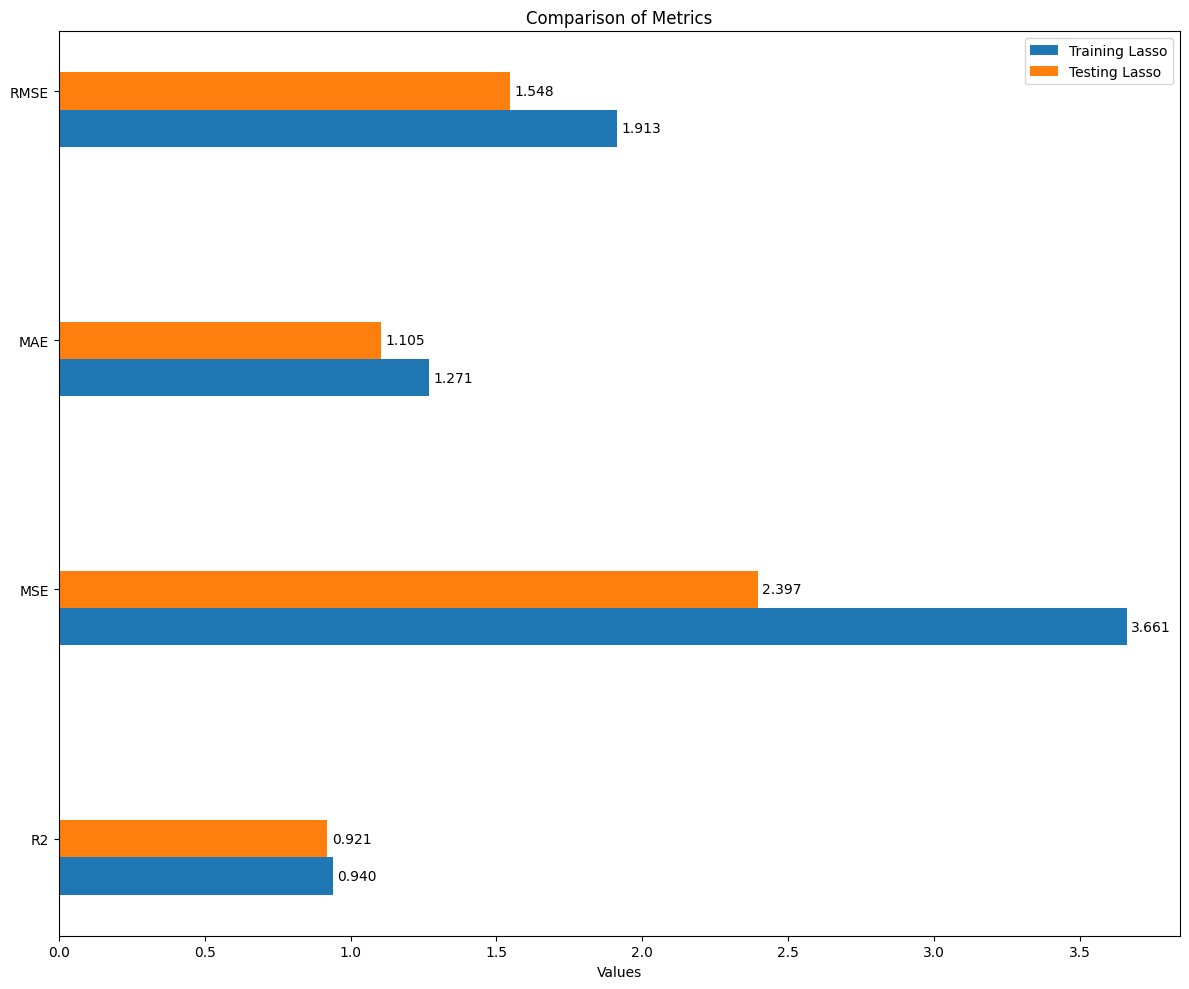

In [735]:
plot4_metrics = [lasso_training_metrics, lasso_testing_metrics]
plot4_labels = ['Training Lasso', 'Testing Lasso']
plot_metrics(plot4_metrics, plot4_labels)

1. Training R2 score of 0.9397 and testing R² score of 0.9209 indicate strong explained variance and good model performance.
2. Training MSE of 3.6605 and testing MSE of 2.3971 show improved performance on the testing dataset.
3.  MAE decreased from 1.2706 (training) to 1.1050 (testing), reflecting better accuracy on unseen data.
4. RMSE reduced from 1.9132 (training) to 1.5483 (testing), indicating lower prediction error on the testing dataset.
The Lasso regression model demonstrates strong performance with high R2 scores and low error metrics on both training and testing datasets, indicating effective learning and good generalization to new data.

## Ridge

In [736]:
# Step 1: Generate polynomial features
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Step 2: Define the Ridge model
poly_ridge_model = Ridge(max_iter=10000)

# Step 3: Set the alpha values to be tested
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Step 4: Set up the grid search with cross-validation
grid_search = GridSearchCV(poly_ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Step 5: Fit the grid search to your training data
grid_search.fit(X_poly_train, y_train)

# Step 6: Get the best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"The best alpha value for Ridge is: {best_alpha}")

The best alpha value for Ridge is: 10


In [737]:
# Step 7: Evaluate the best model on the training set
best_model_ridge = grid_search.best_estimator_
y_pred_train = best_model_ridge.predict(X_poly_train)
ridge_training_metrics = Metrics.calc_metrics(y_train, y_pred_train)
print("Metrics of Ridge on training dataset:")
print(ridge_training_metrics)

# Step 8: Evaluate the best model on the test set
y_pred = best_model_ridge.predict(X_poly_test)
ridge_testing_metrics = Metrics.calc_metrics(y_test, y_pred)
print("Metrics of Ridge on testing dataset:")
print(ridge_testing_metrics)

Metrics of Ridge on training dataset:
Metrics(R2 score=0.9476222658651093, MSE=3.177792659870086, MAE=1.2127443856065447, RMSE=1.7826364351347939)
Metrics of Ridge on testing dataset:
Metrics(R2 score=0.9217046535327917, MSE=2.3730083615155797, MAE=1.1259219760761223, RMSE=1.5404571923671166)


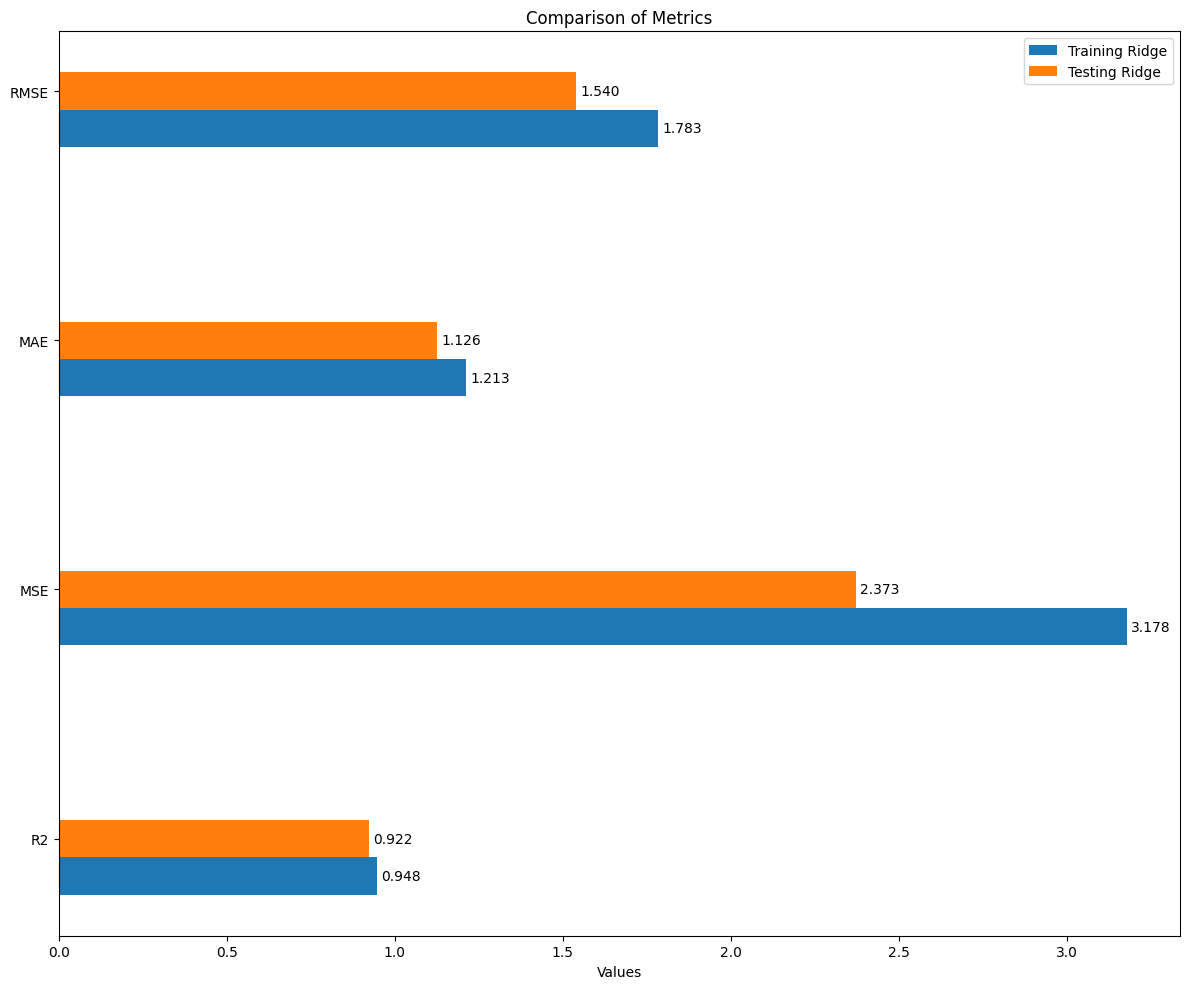

In [738]:
plot5_metrics = [ridge_training_metrics, ridge_testing_metrics]
plot5_labels = ['Training Ridge', 'Testing Ridge']
plot_metrics(plot5_metrics, plot5_labels)


1. Training R² score of 0.9476 and testing R² score of 0.9217 indicate strong explained variance and effective model performance on both datasets.
2.  Training MSE of 3.1778 and testing MSE of 2.3730 show improved predictive accuracy on the testing dataset compared to the training dataset.
3.  MAE decreased from 1.2127 (training) to 1.1259 (testing), reflecting better accuracy in predictions for unseen data.
4.  RMSE reduced from 1.7826 (training) to 1.5405 (testing), indicating lower prediction error on the testing dataset.


The Ridge model exhibits a slight difference in performance between training and testing datasets, with no significant signs of overfitting. The decrease in both MSE and RMSE on the testing dataset suggests that Ridge regularization effectively mitigated overfitting, allowing the model to generalize well to unseen data.

## Elastic Net

In [739]:
# Step 1: Generate polynomial features
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Step 2: Define the Ridge model
poly_elastic_model = ElasticNet(max_iter=10000)

# Step 3: Set the alpha values to be tested
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Step 4: Set up the grid search with cross-validation
grid_search = GridSearchCV(poly_elastic_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Step 5: Fit the grid search to your training data
grid_search.fit(X_poly_train, y_train)

# Step 6: Get the best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"The best alpha value for Ridge is: {best_alpha}")

The best alpha value for Ridge is: 0.1


In [740]:
# Step 7: Evaluate the best model on the training set
best_model_elastic = grid_search.best_estimator_
y_pred_train = best_model_elastic.predict(X_poly_train)
elastic_training_metrics = Metrics.calc_metrics(y_train, y_pred_train)
print("Metrics of ElasticNet on training dataset:")
print(elastic_training_metrics)

# Step 8: Evaluate the best model on the test set
y_pred = best_model_elastic.predict(X_poly_test)
elastic_testing_metrics = Metrics.calc_metrics(y_test, y_pred)
print("Metrics of Elastic on testing dataset:")
print(elastic_testing_metrics)

Metrics of ElasticNet on training dataset:
Metrics(R2 score=0.9410613182854185, MSE=3.5758498000823757, MAE=1.2796283955870378, RMSE=1.890991750400402)
Metrics of Elastic on testing dataset:
Metrics(R2 score=0.9286465114817295, MSE=2.1626116048682107, MAE=1.0172471437334507, RMSE=1.4705820632892985)


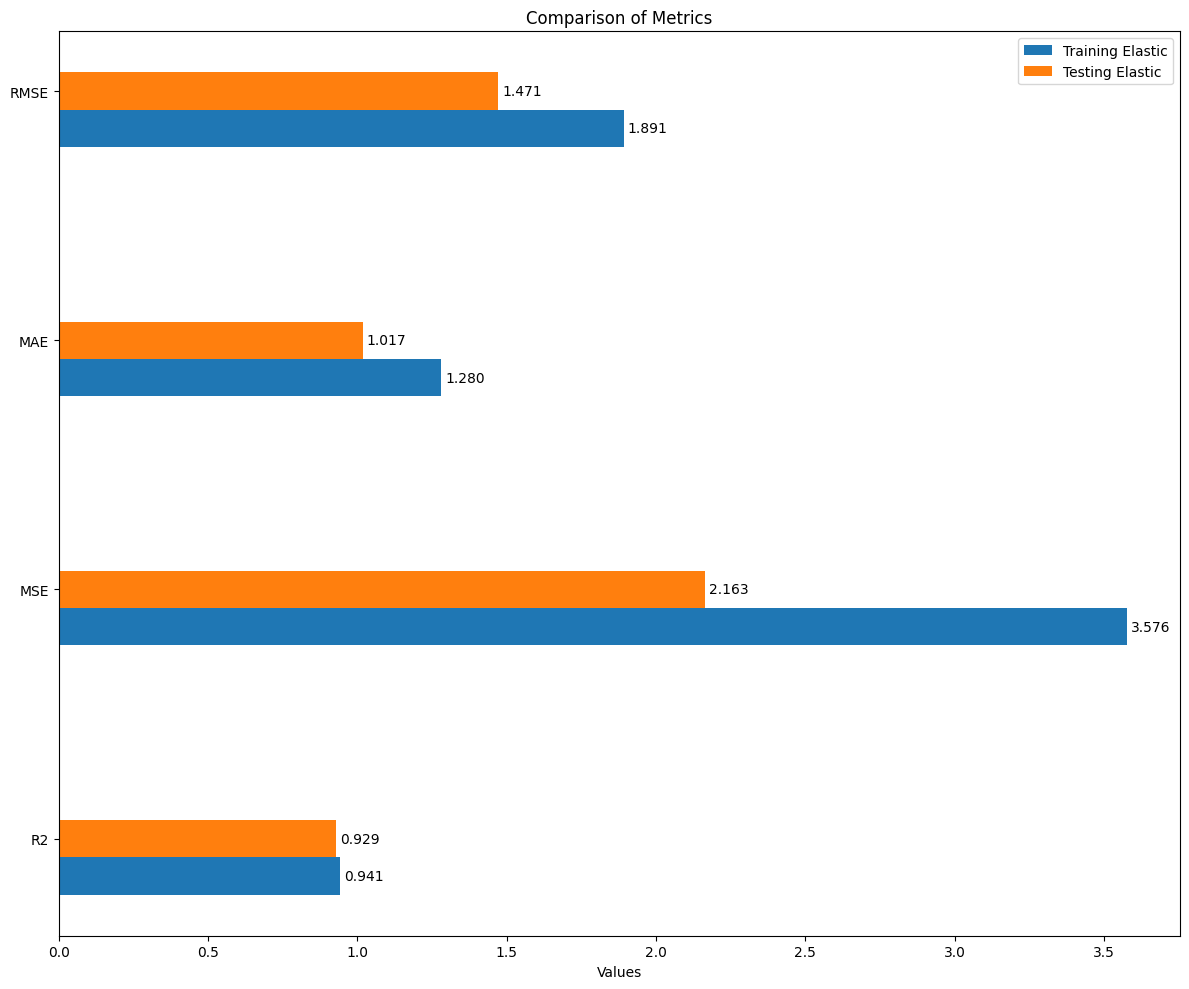

In [741]:
plot6_metrics = [elastic_training_metrics, elastic_testing_metrics]
plot6_labels = ['Training Elastic', 'Testing Elastic']
plot_metrics(plot6_metrics, plot6_labels)

1. Training R2 score of 0.9411 and testing R² score of 0.9286 indicate strong explained variance and effective model performance on both datasets.
2. Training MSE of 3.5758 and testing MSE of 2.1626 show improved accuracy on the testing dataset compared to the training dataset.
3. MAE decreased from 1.2796 (training) to 1.0172 (testing), reflecting enhanced prediction accuracy for unseen data.
4.  RMSE reduced from 1.8910 (training) to 1.4706 (testing), indicating lower prediction error on the testing dataset.

The ElasticNet model demonstrates strong performance, with high R2 scores and decreasing error metrics from training to testing datasets, suggesting effective generalization to unseen data while capturing the underlying relationships.

##Comparison of 3 fine-tuned models

In [742]:
print("Metrics of Lasso on testing dataset:")
print(lasso_testing_metrics)
print("Metrics of Ridge on testing dataset:")
print(ridge_testing_metrics)
print("Metrics of ElasticNet on testing dataset:")
print(elastic_testing_metrics)


Metrics of Lasso on testing dataset:
Metrics(R2 score=0.9209085763465641, MSE=2.3971362044151743, MAE=1.1050231307523357, RMSE=1.548268776542101)
Metrics of Ridge on testing dataset:
Metrics(R2 score=0.9217046535327917, MSE=2.3730083615155797, MAE=1.1259219760761223, RMSE=1.5404571923671166)
Metrics of ElasticNet on testing dataset:
Metrics(R2 score=0.9286465114817295, MSE=2.1626116048682107, MAE=1.0172471437334507, RMSE=1.4705820632892985)


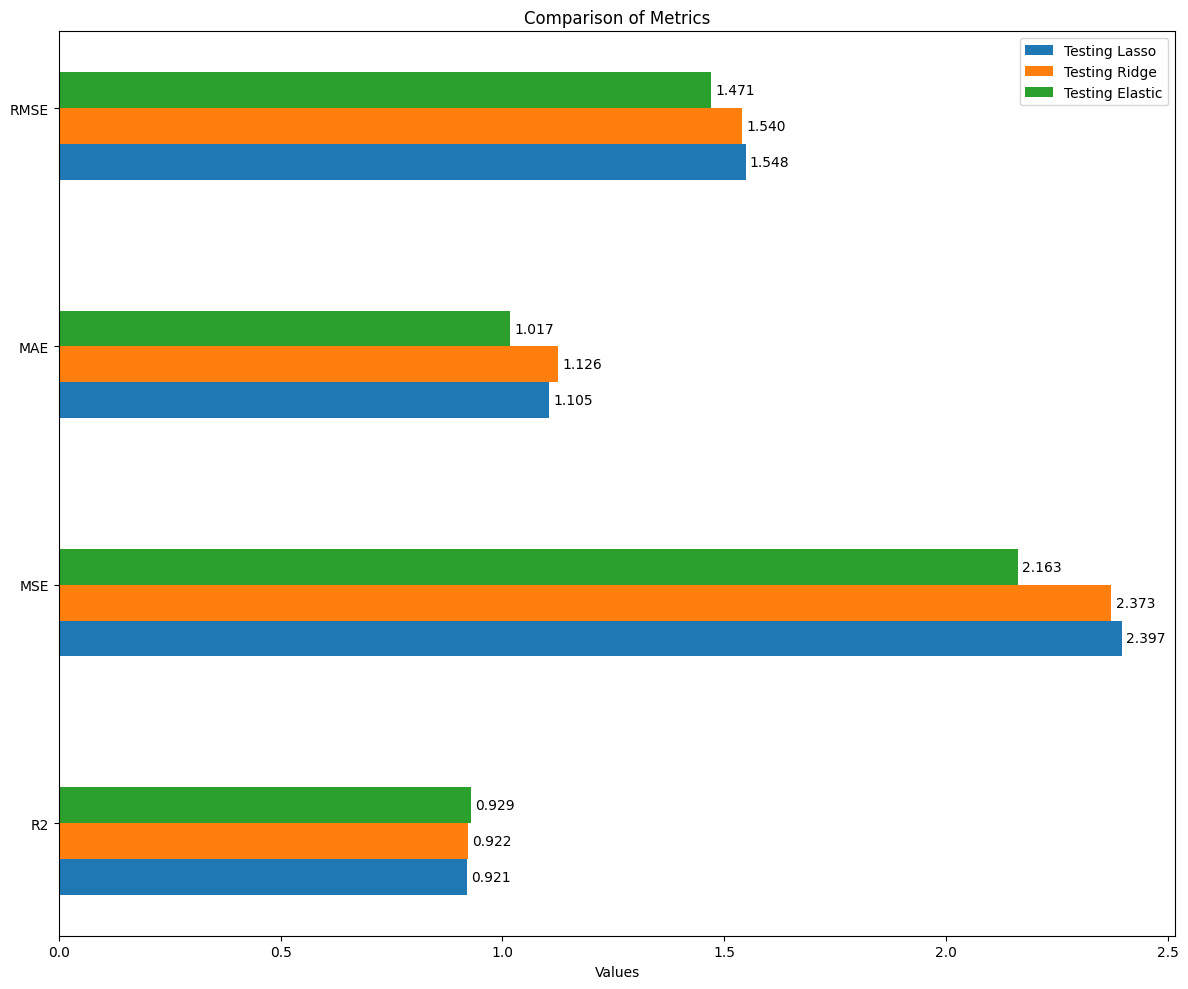

In [743]:
plot7_metrics = [lasso_testing_metrics, ridge_testing_metrics, elastic_testing_metrics]
plot7_labels = ['Testing Lasso', 'Testing Ridge', 'Testing Elastic']
plot_metrics(plot7_metrics, plot7_labels)


1. **ElasticNet has the highest R² score (0.9286)**, indicating it explains the most variance in the testing dataset.

2. **ElasticNet shows the lowest Mean Squared Error (MSE) of 2.1626**, suggesting it has the best predictive accuracy among the models.

3. **ElasticNet has the lowest Mean Absolute Error (MAE) of 1.0172**, reflecting the smallest average error in predictions compared to Lasso and Ridge.

4. **ElasticNet also exhibits the lowest Root Mean Squared Error (RMSE) of 1.4706**, indicating superior performance in terms of prediction error.

5. **Overall, ElasticNet consistently outperforms Lasso and Ridge** across all key metrics, demonstrating its effectiveness in capturing relationships in the data.

6. **ElasticNet is recommended as the best-performing model** for this dataset, providing the most accurate predictions with the least error.

# Saving model  1 as pickle file

In [744]:
import pickle

# Save the scaler and model to pickle files
pickle.dump(scaler1, open('algerian_fires_scaler1.pkl', 'wb'))
pickle.dump(lr1, open('algerian_fires_model1.pkl', 'wb'))

